In [42]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from pyclustering.cluster.kmedians import kmedians

from pyclustering.utils import draw_clusters
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

def template_clustering(start_medians, data, tolerance = 0.25):    
    kmedians_instance = kmedians(data, start_medians, tolerance)
    (ticks, result) = timedcall(kmedians_instance.process)
    
    clusters = kmedians_instance.get_clusters()
    print("Execution time: ", ticks)
    print("Number of clusters: ", len(clusters))

    return clusters

In [7]:
%%time
datasetPath = "../dataset/users_clean_with_indicators_with_outliers.h5"
df_users = pd.read_hdf(datasetPath)

CPU times: user 61.9 ms, sys: 30.9 ms, total: 92.8 ms
Wall time: 142 ms


<timed exec>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [10]:
# delete categorical attributes
del df_users['name']
del df_users['lang']
del df_users['bot']
del df_users['created_at']

In [11]:
df_users.describe()

,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg,...,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,retweet_count_entropy,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_mentions_entropy
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,...,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,5750.093500,940.685871,362.744886,0.369431,17.567901,0.154632,0.090168,0.360214,69.420737,5.618642,...,230.172402,2150.310393,159.894334,151.227146,492.222193,1.928334,0.112597,2.611871,2.666329,3.420989
std,18752.596595,1227.536451,2180.431575,7.723115,362.633067,0.230345,0.181239,0.367936,16.519805,5.589786,...,3878.299781,27870.387975,482.533814,397.999724,1003.377872,1.716214,0.435810,2.306260,1.933728,2.603358
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,65.000000,0.023810,0.000000,0.024031,0.050000,0.000000,0.010623,60.634728,3.722736,...,0.000000,3.000000,5.000000,0.000000,2.000000,0.288095,0.000000,0.636514,1.332179,0.693147
50%,71.000000,132.000000,0.108611,0.000000,0.064698,0.085106,0.017844,0.315385,66.760846,4.500412,...,0.000000,10.000000,11.000000,1.000000,36.000000,1.609438,0.000000,1.945910,2.055979,3.583519
75%,2520.250000,1700.000000,117.474227,0.000000,0.269265,0.170313,0.078116,0.524956,78.873718,5.709773,...,0.000000,401.000000,115.000000,83.000000,431.000000,3.124181,0.000000,4.835514,4.233378,5.794776
max,399555.000000,3926.000000,63995.214286,621.666667,22559.916667,6.430140,2.000000,5.782609,245.000000,145.500000,...,200000.000000,924928.000000,16982.000000,3900.000000,13998.000000,7.992865,7.069189,8.019666,8.135237,8.123727


In [13]:
num_entries, num_features = df_users.shape

In [28]:
df_users.head()

,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg,...,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,retweet_count_entropy,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_mentions_entropy
2353593986,76.0,127,0.039370,0.0,0.039370,0.102362,0.000000,0.275591,63.409449,3.952756,...,0,5,13,0,35,1.609438,0.0,1.609438,1.951260,3.555348
2358850842,54.0,116,0.025862,0.0,0.051724,0.025862,0.000000,0.353448,69.672414,3.500000,...,0,6,3,0,41,1.098612,0.0,1.791759,1.098612,3.713572
137959629,3.0,3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,17.333333,4.333333,...,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000
466124818,50.0,1378,0.861393,0.0,0.185051,0.080552,0.025399,0.006531,88.524673,4.818578,...,0,255,111,35,9,2.164284,0.0,5.155743,3.993476,1.831020
2571493866,7085.0,3506,0.017399,0.0,0.063605,0.129492,0.000856,0.522533,73.765830,3.669994,...,0,223,454,3,1832,3.965939,0.0,5.332573,5.842069,7.339108


In [31]:
users_points = np.zeros((num_entries, num_features))
for i in range(num_entries):
    for j in range(num_features):
        users_points[i][j] = df_users.iloc[i, j]

In [56]:
k = 6
centroids = np.zeros((k, num_features))
samples = df_users.sample(n = k)
for i in range(k):
    for j in range(num_features):
        centroids[i][j] = samples.iloc[i, j]
centroids

array([[2.04100000e+03, 5.80000000e+01, 7.22586207e+01, 1.72413793e-02,
        5.17241379e-02, 2.41379310e-01, 3.44827586e-02, 1.72413793e-02,
        6.90517241e+01, 4.79310345e+00, 4.19100000e+03, 1.00000000e+00,
        3.00000000e+00, 1.40000000e+01, 2.00000000e+00, 1.00000000e+00,
        2.22872234e-03, 0.00000000e+00, 6.36514168e-01, 2.34199425e+00,
        0.00000000e+00],
       [3.40000000e+01, 4.20000000e+01, 9.61428571e+01, 0.00000000e+00,
        0.00000000e+00, 9.52380952e-02, 4.76190476e-02, 4.76190476e-02,
        5.80000000e+01, 3.92857143e+00, 4.03800000e+03, 0.00000000e+00,
        0.00000000e+00, 4.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        6.93147181e-01, 0.00000000e+00, 0.00000000e+00, 1.38629436e+00,
        6.93147181e-01],
       [3.70000000e+01, 3.90000000e+01, 3.06666667e+01, 2.56410256e-02,
        0.00000000e+00, 1.79487179e-01, 1.02564103e-01, 7.69230769e-02,
        7.50256410e+01, 1.21538462e+01, 1.19600000e+03, 1.00000000e+00,
        0.0000

In [57]:
clusters = template_clustering(centroids, users_points)

Execution time:  3.598481527000331
Number of clusters:  6


In [58]:
cluster_labels=np.empty(shape=(num_entries,))
for clus_ind in range(len(clusters)):
    clus = clusters[clus_ind]
    for j in range(len(clus)):
        point = clus[j]
        cluster_labels[point] = clus_ind

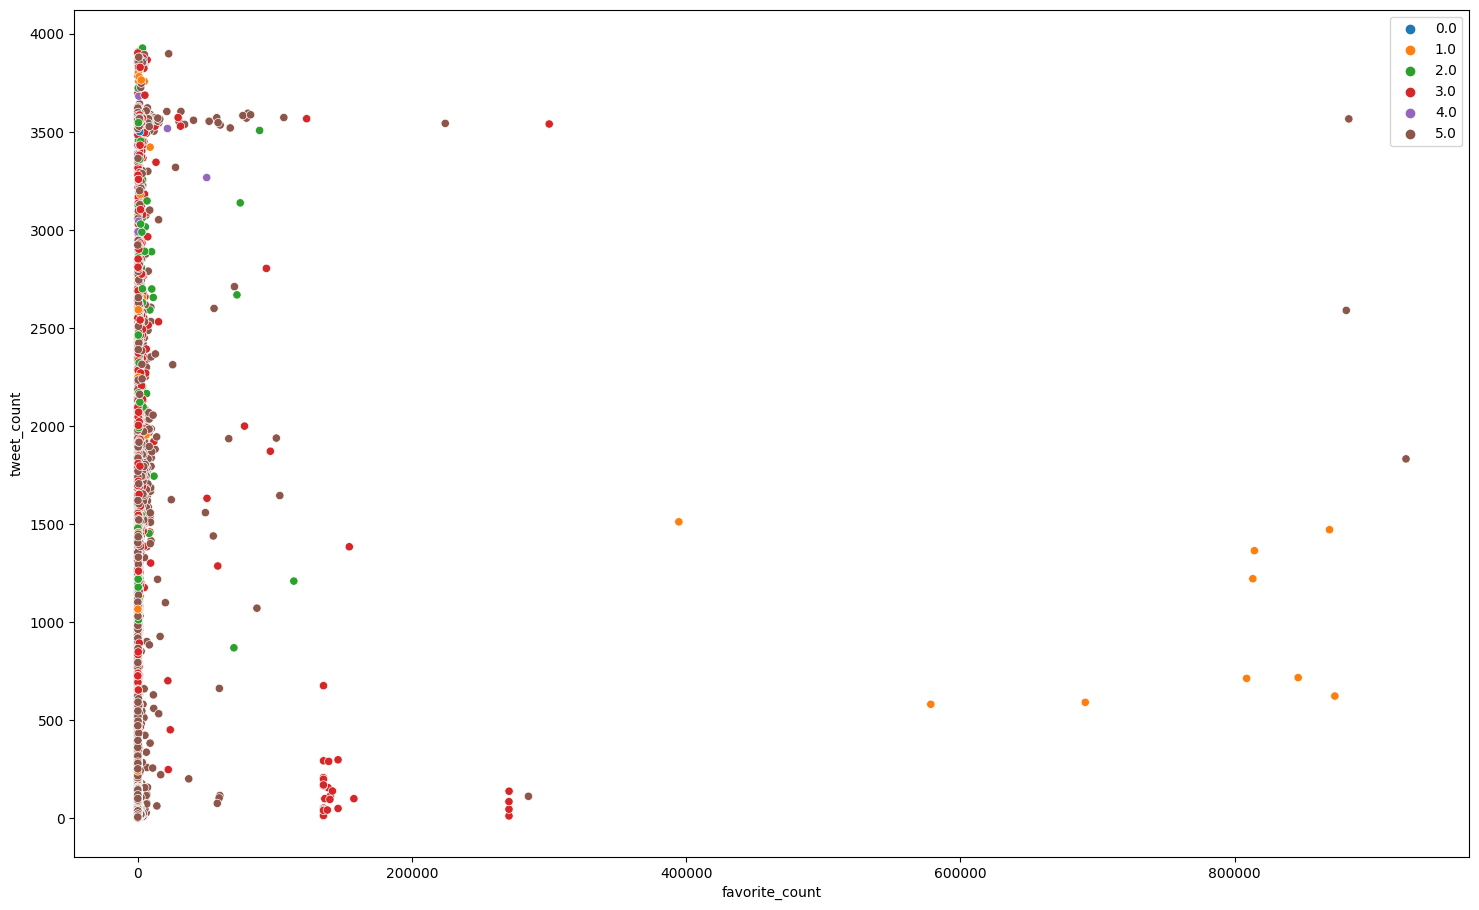

In [59]:
plt.figure(figsize=(18,11))
sn.scatterplot(data=df_users, x="favorite_count", y="tweet_count", hue=cluster_labels, palette=sn.color_palette(n_colors=len(clusters)))
plt.show()